<a href="https://colab.research.google.com/github/Anuskaghosh/Anuskaghosh/blob/main/image%20_classification_using_CNN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
!pip install tensorflow
!pip install opencv-python numpy



/bin/bash: line 1: nvidia-smi: command not found


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.applications.inception_v3 import InceptionV3


In [4]:
import os

path = '/content/drive/MyDrive/Dataset/Tuberculosis'
if os.path.exists(path):
    print("Files in Tuberculosis directory:")
    print(os.listdir(path))
else:
    print("Tuberculosis directory does not exist.")


Tuberculosis directory does not exist.


In [5]:
import os
import cv2
import numpy as np

train_dir = "/content/drive/MyDrive/Dataset/datasetTB/train"
val_dir = "/content/drive/MyDrive/Dataset/datasetTB/val"

# Load images and labels from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['Tuberculosis', 'Normal']:
        path = os.path.join(folder, label)
        for filename in os.listdir(path):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                if label == 'Tuberculosis':
                    labels.append(0)
                else:
                    labels.append(1)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_dir)
val_images, val_labels = load_images_from_folder(val_dir)

train_images = train_images / 255.0
val_images = val_images / 255.0


In [6]:
print(train_images.shape)

(974, 224, 224, 3)


In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)

# # Model definition
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     BatchNormalization(),
#     Dropout(0.25),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     BatchNormalization(),
#     Dropout(0.25),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(2, activation='softmax')  ])

In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
#Normalization
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation.map(process)

In [15]:
# #create CNN model

# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))




In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 28,103,464 (107.21 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,200,454 (16.02 MB)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data = val_ds)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.8689 - loss: 10.1649 - val_accuracy: 0.8333 - val_loss: 1.7017
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.1393 - loss: 5.7172 - val_accuracy: 0.8363 - val_loss: 0.5970
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.1658 - loss: 0.7709 - val_accuracy: 0.8333 - val_loss: 0.5922
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.1658 - loss: 0.7470 - val_accuracy: 0.8333 - val_loss: 0.5884
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.1946 - loss: 0.7299 - val_accuracy: 0.8631 - val_loss: 0.5468
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.3025 - loss: 0.7465 - val_accuracy: 0.8869 - val_loss: 0.5075
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.3781 - loss: 0.7565 - val_accuracy: 0.8988 - val_loss: 0.4655
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.4175 - loss: 0.7662 - val_accuracy: 0.9048 - 

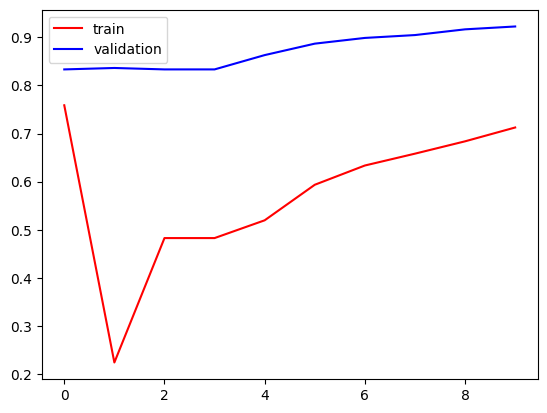

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

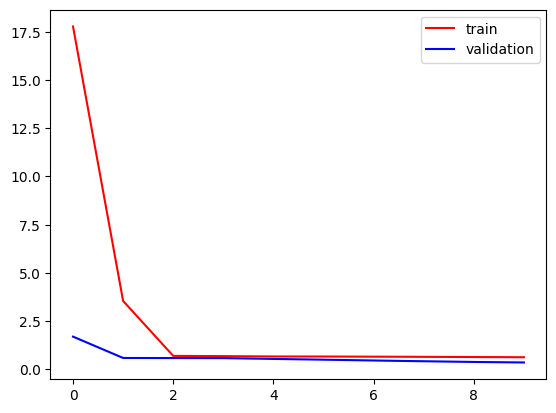

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


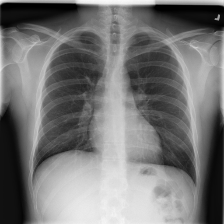

In [35]:
test_img = cv2.imread('/content/drive/MyDrive/Dataset/datasetTB/train/Normal/Normal-10.png')
cv2_imshow(test_img)